In [45]:
import pandas as pd
import numpy as np
#url = "https://www.kaggle.com/sootersaalu/amazon-top-50-bestselling-books-2009-2019?select=bestsellers+with+categories.csv"
df = pd.read_csv("/Users/applecare/Downloads/bestsellers_with_categories.csv")
df.head()


,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [2]:
df.columns

Index(['Name', 'Author', 'User Rating', 'Reviews', 'Price', 'Year', 'Genre'], dtype='object')

In [3]:
df.shape
#550 rows, 7 columns

(550, 7)

In [4]:
df.describe()

,User Rating,Reviews,Price,Year
count,550.000000,550.000000,550.000000,550.000000
mean,4.618364,11953.281818,13.100000,2014.000000
std,0.226980,11731.132017,10.842262,3.165156
min,3.300000,37.000000,0.000000,2009.000000
25%,4.500000,4058.000000,7.000000,2011.000000
50%,4.700000,8580.000000,11.000000,2014.000000
75%,4.800000,17253.250000,16.000000,2017.000000
max,4.900000,87841.000000,105.000000,2019.000000


In [5]:
df.info()
#data types for each columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


In [6]:
#df.isnull().any()
#df.isnull().sum()
#.sum will give u the summation

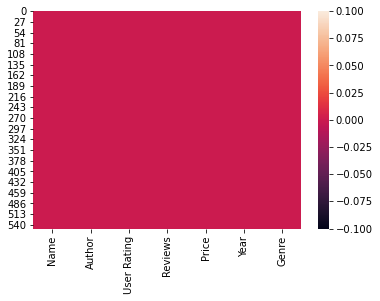

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(df.isnull()) #gives correlation b/n columns
plt.show()

In [8]:
df.median()

User Rating       4.7
Reviews        8580.0
Price            11.0
Year           2014.0
dtype: float64

/Users/applecare/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/applecare/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Reviews'>

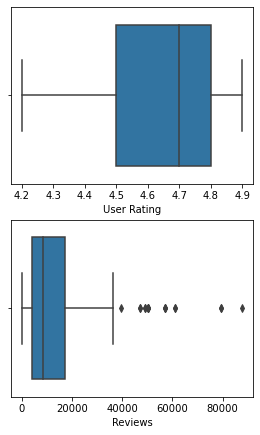

In [29]:
#boxplot gone show you if u av outliers
plt.figure(figsize=(20,15))
plt.subplot(4,4,1)
sns.boxplot(df["User Rating"])

plt.subplot(4,4,2)
sns.boxplot(df["Reviews"])



In [20]:
#the outliers willbe replace wiht clip technique of 95th percentile
df["Price"] = df["Price"].clip(lower=df["Price"].quantile(0.05), upper = df["Price"].quantile(0.95))
#watch video on outliers and why its necessary to remove them


In [25]:
df['Price'] = df['Price'].clip(lower=df['Price'].quantile(0.05), upper=df['Price'].quantile(0.95))


In [18]:
df['User Rating'] =df['User Rating'].clip(lower=df['User Rating'].quantile(0.05), upper=df['User Rating'].quantile(0.95))

/Users/applecare/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/applecare/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Price'>

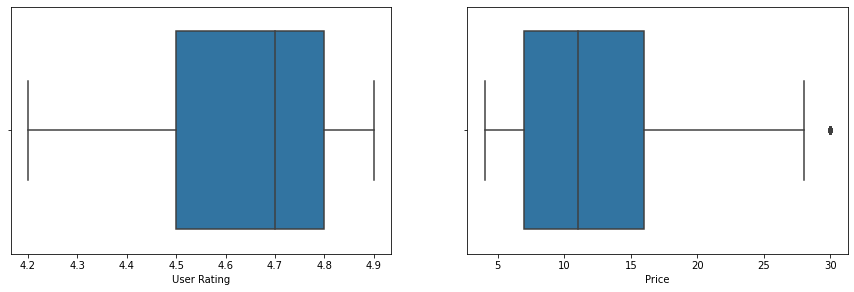

In [37]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.boxplot(df['User Rating'] )

plt.subplot(2,2,2)
sns.boxplot(df["Price"])

<AxesSubplot:xlabel='Year', ylabel='count'>

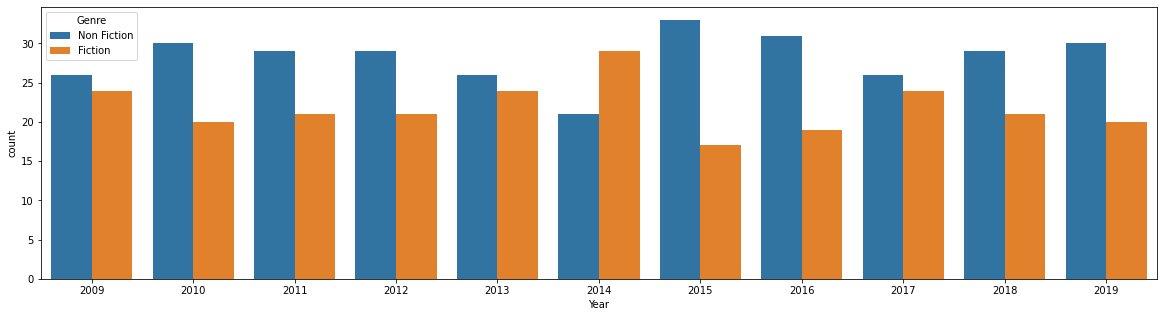

In [46]:
#Explore trend over the year for each genre
plt.figure(figsize=(20,5))

#A count plot can be thought of as a histogram across a categorical, instead of quantitative, variable. 
sns.countplot(x="Year", data=df,  hue="Genre")